# Les Crimes à Boston

In [1]:
# Useful imports for data manipulation and analysis
import numpy as np
import pandas as pd

In [2]:
# Useful imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [5]:
clean_data = data[data['LONG'] != -1]

In [7]:
data_date = clean_data.copy()

In [8]:
data_date['OCCURRED_ON_DATE'] = data['OCCURRED_ON_DATE'].apply(lambda x: x[11:13]).astype(int)

In [9]:
data_night = data_date[(data_date['OCCURRED_ON_DATE']<8)|(data_date['OCCURRED_ON_DATE']>20)]
data_day = data_date[(data_date['OCCURRED_ON_DATE']>8)&(data_date['OCCURRED_ON_DATE']<20)]

In [12]:
def custom_agg(data):
    # On crée le dataframe principal
    df = pd.DataFrame( {'NAME':[],'Most_common_category_of_incident':[]})
    for i in data['NAME'].unique():
        # On calcule le nombre de chaque type d'incident sur un district
        district = data[data['NAME'] == i].value_counts('OFFENSE_CODE_GROUP',sort=True, ascending=False)
        # On récupère l'incident le plus courant (district.index[0]) et on créer un dataframe
        df_1 = pd.DataFrame( {'NAME':[i],'Most_common_category_of_incident':[district.index[0]]})
        # On merge avec le Dataframe principal
        df = pd.merge(df,df_1,how = 'outer')
    return df

Nous avons poursuivi notre analyse des données collectées sur les crimes à Boston entre 2015 et 2019. En analysant les données, nous n'avons pas remarqué de tendance particulière. Nous avons étudié le type de crime sur tout Boston et selon les districts, et la position des crimes par rapport aux stations.

Dans tous les districts, le crime le plus fréquent est le vandalisme et le vol.

Cela reste vrai de jour (8h-20h) comme de nuit (20h-8h)

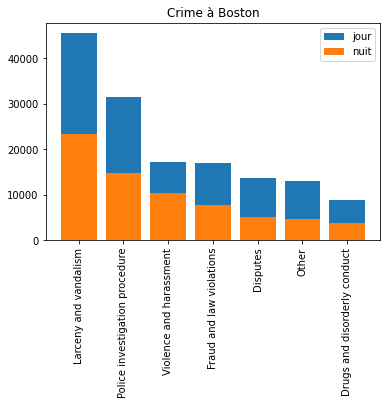

In [48]:
district = data_day.value_counts('OFFENSE_CODE_GROUP',sort=True, ascending=False)
heights = district
bars = district.index
y_pos = range(len(bars))
plt.title('Crime à Boston')
plt.bar(y_pos, heights, label ='jour')
plt.xticks(y_pos, bars, rotation=90)

district = data_night.value_counts('OFFENSE_CODE_GROUP',sort=True, ascending=False)
heights = district
bars = district.index
y_pos = range(len(bars))
plt.bar(y_pos, heights,label = 'nuit')
plt.xticks(y_pos, bars, rotation=90)

plt.legend();

On remarque également que le nombre de crimes commis la nuit est nettement inférieure au nombre de crimes commit le jour.

Cette tendance se retrouve individuellement dans chacun des districts, à l'exception de Mattapan, où le crime les plus commit sont ceux nécessitant une procédure d'investigation de la police :

In [19]:
custom_agg(clean_data)

,NAME,Most_common_category_of_incident
0,Roxbury,Larceny and vandalism
1,Dorchester,Larceny and vandalism
2,Downtown,Larceny and vandalism
3,Hyde Park,Larceny and vandalism
4,South End,Larceny and vandalism
5,Mattapan,Police investigation procedure
6,Brighton,Larceny and vandalism
7,East Boston,Larceny and vandalism
8,West Roxbury,Larceny and vandalism
9,South Boston,Larceny and vandalism


Remarquons que le nombre de Larceny et de vandalisme à Mattapan reste très proche de ceux nécessitant une procédure d'investigation de la police :

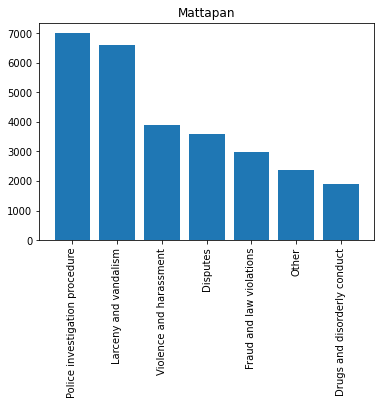

In [49]:
district = clean_data[clean_data['NAME'] == 'Mattapan'].value_counts('OFFENSE_CODE_GROUP',sort=True, ascending=False)
plt.title('Mattapan')
heights = district
bars = district.index
y_pos = range(len(bars))
plt.bar(y_pos, heights)
plt.xticks(y_pos, bars, rotation=90);

Nous avons étudié la position des crimes par rapport aux stations dans chaque district :

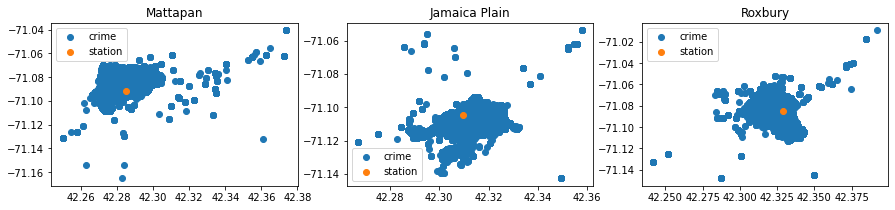

In [51]:
fig, (ax) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))

data_Matt = clean_data[clean_data['NAME']=='Mattapan'].reset_index()

ax[0].scatter(data_Matt['LAT'],data_Matt['LONG'],label ='crime')
ax[0].scatter(data_Matt['LAT_POLICE_STATION'][0],data_Matt['LONG_POLICE_STATION'][0],label='station')
ax[0].legend()

data_Jam = clean_data[clean_data['NAME']=='Jamaica Plain'].reset_index()

ax[1].scatter(data_Charl['LAT'],data_Charl['LONG'],label ='crime')
ax[1].scatter(data_Charl['LAT_POLICE_STATION'][0],data_Charl['LONG_POLICE_STATION'][0],label='station')
ax[1].legend()

data_Rox = clean_data[clean_data['NAME']=='Roxbury'].reset_index()

ax[2].scatter(data_Rox['LAT'],data_Rox['LONG'],label ='crime')
ax[2].scatter(data_Rox['LAT_POLICE_STATION'][0],data_Rox['LONG_POLICE_STATION'][0],label='station')
ax[2].legend()


ax[0].title.set_text('Mattapan')
ax[1].title.set_text('Jamaica Plain')
ax[2].title.set_text('Roxbury')

Chaque station semble bien située par rapport aux crimes, à l'exception de celle de Charlestown :

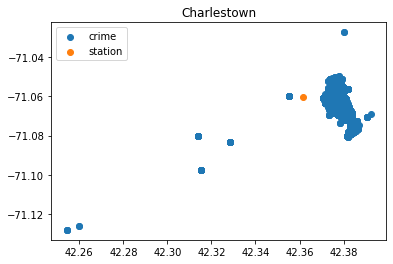

In [55]:
data_Charl = clean_data[clean_data['NAME']=='Charlestown'].reset_index()
plt.scatter(data_Charl['LAT'],data_Charl['LONG'],label ='crime')
plt.scatter(data_Charl['LAT_POLICE_STATION'][0],data_Charl['LONG_POLICE_STATION'][0],label='station')
plt.title('Charlestown')
plt.legend();

Il pourrait être intéressant de déménager la station de Charlestown pour augmenter la vitesse d'intervention.